In [1]:
from model.model_initialization import * 
initialize_model(1000, 10, 0.01, 0.02)

{'cfmm_type': '',
 'initial_values': {'token_list': ['R1', 'R2'],
  'R': [1000, 1500000],
  'P': [2, 0.6666666666666666],
  'fee_assets': 0.01,
  'fee_LRNA': 0.02},
 'agent_d': {'Trader': {'HDX': 1000000, 'R1': 1000000, 'R2': 1000000},
  'LP1': {'omniR1': 10}},
 'action_ls': [('trade', 1000)],
 'prob_dict': {'trade': {'sell_r2_for_r1': 0.5, 'sell_r1_for_r2': 0.5}},
 'action_dict': {'sell_r2_for_r1': {'token_buy': 'R1',
   'token_sell': 'R2',
   'amount_sell': 10,
   'action_id': 'Trade',
   'agent_id': 'Trader'},
  'sell_r1_for_r2': {'token_sell': 'R1',
   'token_buy': 'R2',
   'amount_sell': 10,
   'action_id': 'Trade',
   'agent_id': 'Trader'}}}

In [2]:
import pandas as pd

from IPython.core.debugger import Pdb
ipdb = Pdb()

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *
from model.model_initialization import * 

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

fee_level_assets = 0.03
fee_level_lrna = 0.00
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
#trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
#liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)
trade_volume = (50, 100)
liquidity = (100000, 200000)

#create matrix for comparison
m=len(trade_volume)
n=len(liquidity)
matrix = np.ndarray(shape = (m,n), dtype = int)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index


for i in range(len(liquidity)):
    for j in range(len(trade_volume)):
        # initialize model with starting conditions
        config_params = initialize_model(liquidity[i], trade_volume[j], fee_level_assets, fee_level_lrna)
        
        #run model
        config_dict, state = init_utils.get_configuration(config_params)

        pd.options.mode.chained_assignment = None  # default='warn'
        pd.options.display.float_format = '{:.2f}'.format
        
        run.config(config_dict, state)
        events = run.run()
        
        rdf, agent_df = processing.postprocessing(events)
        
        
        # fill in matrix with calculation results at specific place
        #matrix[j][i] = np.random.randint(1, 100 + 1)
        matrix[j][i] = trade_volume[i]*liquidity[j]





#print(agent_df.tail(20))




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 1.50s

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 2
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0, 1]
SubsetIDs: [0, 0]
Ns       : [0, 0]
ExpIDs   : [0, 0]
Execution Mode: parallelized
Total execution time: 3.12s



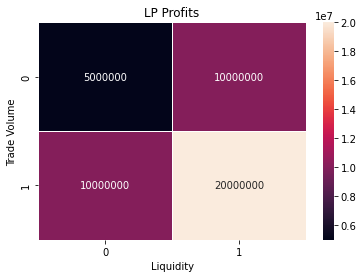

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Liquidity')
ax.set_ylabel('Trade Volume')
plt.show()


var_list = ['R', 'Q', 'A', 'D']
plot_vars(rdf, var_list)

## Fee Analysis

In [4]:
rdf

,R-0,R-1,Q-0,Q-1,S-0,S-1,A-0,A-1,B-0,B-1,...,token_list-0,token_list-1,fee_assets,fee_LRNA,n,simulation,subset,run,substep,timestep
3,100050.00,1499854.59,199900.05,1000102.95,100000,1500000,0,0,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,1
6,100033.82,1499904.59,199934.39,1000069.61,100000,1500000,0,0,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,2
9,100017.64,1499954.59,199968.73,1000036.27,100000,1500000,0,0,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,3
12,100001.47,1500004.59,200003.06,1000002.94,100000,1500000,0,0,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,4
15,100051.47,1499859.17,199903.11,1000105.89,100000,1500000,0,0,99950,1500000,...,R1,R2,0.03,0.00,2,0,0,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11991,232743.14,1425045.23,345603.62,1058080.82,200000,1500000,0,0,199900,1500000,...,R1,R2,0.03,0.00,2,3,0,1,3,996
11994,232694.66,1425145.23,345680.09,1058006.58,200000,1500000,0,0,199900,1500000,...,R1,R2,0.03,0.00,2,3,0,1,3,997
11997,232646.20,1425245.23,345756.55,1057932.35,200000,1500000,0,0,199900,1500000,...,R1,R2,0.03,0.00,2,3,0,1,3,998
12000,232746.20,1425051.12,345607.99,1058085.36,200000,1500000,0,0,199900,1500000,...,R1,R2,0.03,0.00,2,3,0,1,3,999


In [5]:
print(rdf.columns)

Index(['R-0', 'R-1', 'Q-0', 'Q-1', 'S-0', 'S-1', 'A-0', 'A-1', 'B-0', 'B-1',
       'D', 'T', 'H', 'token_list-0', 'token_list-1', 'fee_assets', 'fee_LRNA',
       'n', 'simulation', 'subset', 'run', 'substep', 'timestep'],
      dtype='object')


In [6]:
print(rdf.keys)

<bound method NDFrame.keys of             R-0        R-1       Q-0        Q-1     S-0      S-1  A-0  A-1  \
3     100050.00 1499854.59 199900.05 1000102.95  100000  1500000    0    0   
6     100033.82 1499904.59 199934.39 1000069.61  100000  1500000    0    0   
9     100017.64 1499954.59 199968.73 1000036.27  100000  1500000    0    0   
12    100001.47 1500004.59 200003.06 1000002.94  100000  1500000    0    0   
15    100051.47 1499859.17 199903.11 1000105.89  100000  1500000    0    0   
...         ...        ...       ...        ...     ...      ...  ...  ...   
11991 232743.14 1425045.23 345603.62 1058080.82  200000  1500000    0    0   
11994 232694.66 1425145.23 345680.09 1058006.58  200000  1500000    0    0   
11997 232646.20 1425245.23 345756.55 1057932.35  200000  1500000    0    0   
12000 232746.20 1425051.12 345607.99 1058085.36  200000  1500000    0    0   
12003 232846.20 1424857.24 345459.57 1058238.24  200000  1500000    0    0   

          B-0      B-1  ...  toke

In [7]:
agent_df

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,r-1,p-0,p-1
6,0,0,1,3,1,Trader,0.00,0,0,999950.00,1000145.41,0.00,0
7,0,0,1,3,1,LP1,0.00,50,0,0.00,0.00,2.00,0
12,0,0,1,3,2,Trader,0.00,0,0,999966.18,1000095.41,0.00,0
13,0,0,1,3,2,LP1,0.00,50,0,0.00,0.00,2.00,0
18,0,0,1,3,3,Trader,0.00,0,0,999982.36,1000045.41,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,3,0,1,3,998,LP1,0.00,100,0,0.00,0.00,2.00,0
24000,3,0,1,3,999,Trader,0.00,0,0,967253.80,1074948.88,0.00,0
24001,3,0,1,3,999,LP1,0.00,100,0,0.00,0.00,2.00,0
24006,3,0,1,3,1000,Trader,0.00,0,0,967153.80,1075142.76,0.00,0


In [8]:
agent_df.query('agent_label=="LP1"')

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,r-0,r-1,p-0,p-1
7,0,0,1,3,1,LP1,0.00,50,0,0.00,0.00,2.00,0
13,0,0,1,3,2,LP1,0.00,50,0,0.00,0.00,2.00,0
19,0,0,1,3,3,LP1,0.00,50,0,0.00,0.00,2.00,0
25,0,0,1,3,4,LP1,0.00,50,0,0.00,0.00,2.00,0
31,0,0,1,3,5,LP1,0.00,50,0,0.00,0.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23983,3,0,1,3,996,LP1,0.00,100,0,0.00,0.00,2.00,0
23989,3,0,1,3,997,LP1,0.00,100,0,0.00,0.00,2.00,0
23995,3,0,1,3,998,LP1,0.00,100,0,0.00,0.00,2.00,0
24001,3,0,1,3,999,LP1,0.00,100,0,0.00,0.00,2.00,0


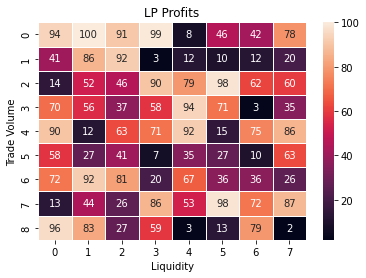

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

fee_level = 0.03
# uniform_data = np.random.rand(10, 12)
#trade_volume = {'10': 0.5, '20': 0.6}
#liquidity = {'1000': 0.5, '2000': 0.6}
trade_volume = (50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)
liquidity = (100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000)

#create matrix for comparison
m=len(trade_volume)
n=len(liquidity)
matrix = np.ndarray(shape = (m,n), dtype = int)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index

# fill in matrix with calculation results
for i in range(len(liquidity)):
    for j in range(len(trade_volume)):
        matrix[j][i] = np.random.randint(1, 100 + 1)




#ax = sns.heatmap(uniform_data, linewidth=0.5)
ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d")
ax.set_title("LP Profits")
#ax.set_title("LP Profits for fee level:" % fee_level)
ax.set_xlabel('Liquidity')
ax.set_ylabel('Trade Volume')
plt.show()

In [10]:
matrix

array([[ 94, 100,  91,  99,   8,  46,  42,  78],
       [ 41,  86,  92,   3,  12,  10,  12,  20],
       [ 14,  52,  46,  90,  79,  98,  62,  60],
       [ 70,  56,  37,  58,  94,  71,   3,  35],
       [ 90,  12,  63,  71,  92,  15,  75,  86],
       [ 58,  27,  41,   7,  35,  27,  10,  63],
       [ 72,  92,  81,  20,  67,  36,  36,  26],
       [ 13,  44,  26,  86,  53,  98,  72,  87],
       [ 96,  83,  27,  59,   3,  13,  79,   2]])

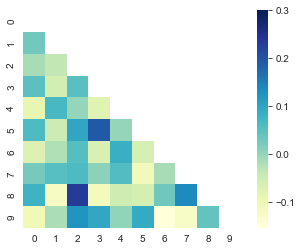

In [11]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,  cmap="YlGnBu")
    plt.show()

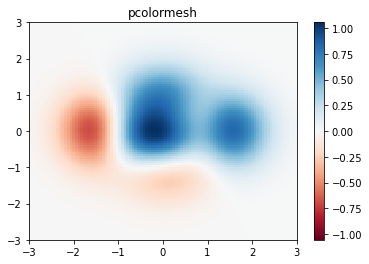

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

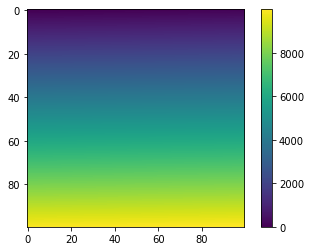

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()


test_array = np.arange(100 * 100).reshape(100, 100)
heatmap2d(test_array)

In [14]:
trade_volume

(50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000)